# Telco Customer Churn Prediction Using XGBoost

**Apa itu Telco Customer Churn Prediction?**

Customer churn adalah kondisi ketika pelanggan berhenti menggunakan layanan perusahaan dalam periode tertentu. Memprediksi churn sangat penting karena biaya untuk mendapatkan pelanggan baru jauh lebih tinggi dibandingkan mempertahankan pelanggan yang sudah ada.

Dengan memprediksi churn lebih awal, perusahaan dapat mengambil tindakan preventif seperti memberikan promo, meningkatkan customer service, atau personalisasi layanan agar pelanggan tetap loyal.

**Stakeholders:**
|Stakeholders |Peran|
|:-----|:----|
|`Tim Marketing` |Menggunakan hasil prediksi untuk memberikan promo atau diskon kepada pelanggan yang berisiko tinggi churn|
|`Tim Machine Learning` |mengembangkan, mengevaluasi, dan memelihara model agar tetap akurat dan relevan dengan kondisi data terbaru|
|`Management / Executives` |Mengambil keputusan strategis berdasarkan insight model dan mengukur dampak bisnis|

**Tujuan/Objektif:**
 - Mengembangkan model machine learning untuk memprediksi apakah pelanggan berpotensi churn (berhenti layanan) atau tidak.
 - Mengidentifikasi faktor-faktor utama yang mempengaruhi churn.




## Import Library

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import numpy as np

## Read Dataset

Pada project Capstone 2 (Modul Machine Learning) ini menggunakan dataset `data_telco_customer_churn.csv`.\
Dibawah ini merupakan beberapa fitur yang terdapat pada dataset.

**Tabel Fitur**

|Fitur |Keterengan|
|:-----|:----|
|`Dependents` |Menunjukkan apakah pelanggan memiliki tanggungan keluarga|
|`Tenure` |Lama pelanggan berlangganan (dalam bulan) |
|`OnlineSecurity` |Apakah pelanggan memiliki layanan keamanan online atau tidak |
|`OnlineBackup` |Apakah pelanggan memiliki layanan backup online atau tidak |
|`InternetService` |Jenis layanan internet yang digunakan |
|`DeviceProtection` |Apakah pelanggan memiliki layanan perlindungan perangkat atau tidak |
|`TechSupport` |Apakah pelanggan memiliki dukungan teknis atau tidak |
|`Contract` |Jenis kontrak berlangganan |
|`PaperlessBilling` |Apakah pelanggan memilih tagihan digital |
|`MonthlyCharges` |Total biaya bulanan yang dibayarkan pelanggan |
|`Churn` |Menunjukkan apakah pelanggan churn (1) atau tidak (0) |

In [39]:
df = pd.read_csv('data_telco_customer_churn.csv')
df.head(5)

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


## Data Understanding

In [40]:
#Menunjukkan dimensi data
df.shape

(4930, 11)

In [41]:
#menunjukkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [42]:
#menunjukkan statistik deskriptif data
df.describe(include='all')

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
count,4930,4930.000000,4930,4930,4930,4930,4930,4930,4930,4930.000000,4930
unique,2,NaN,3,3,3,3,3,3,2,NaN,2
top,No,NaN,No,No,Fiber optic,No,No,Month-to-month,Yes,NaN,No
freq,3446,NaN,2445,2172,2172,2186,2467,2721,2957,NaN,3614
mean,NaN,32.401217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.883032,NaN
std,NaN,24.501193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.923960,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.800000,NaN
25%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.050000,NaN
50%,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN


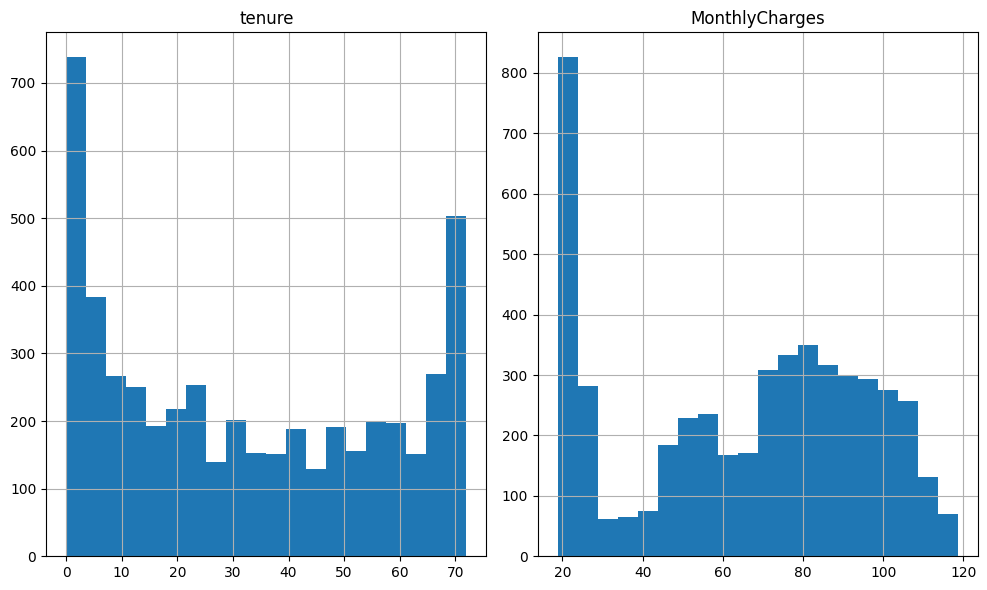

In [43]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols].hist(figsize=(10,6), bins=20)
plt.tight_layout()
plt.show()

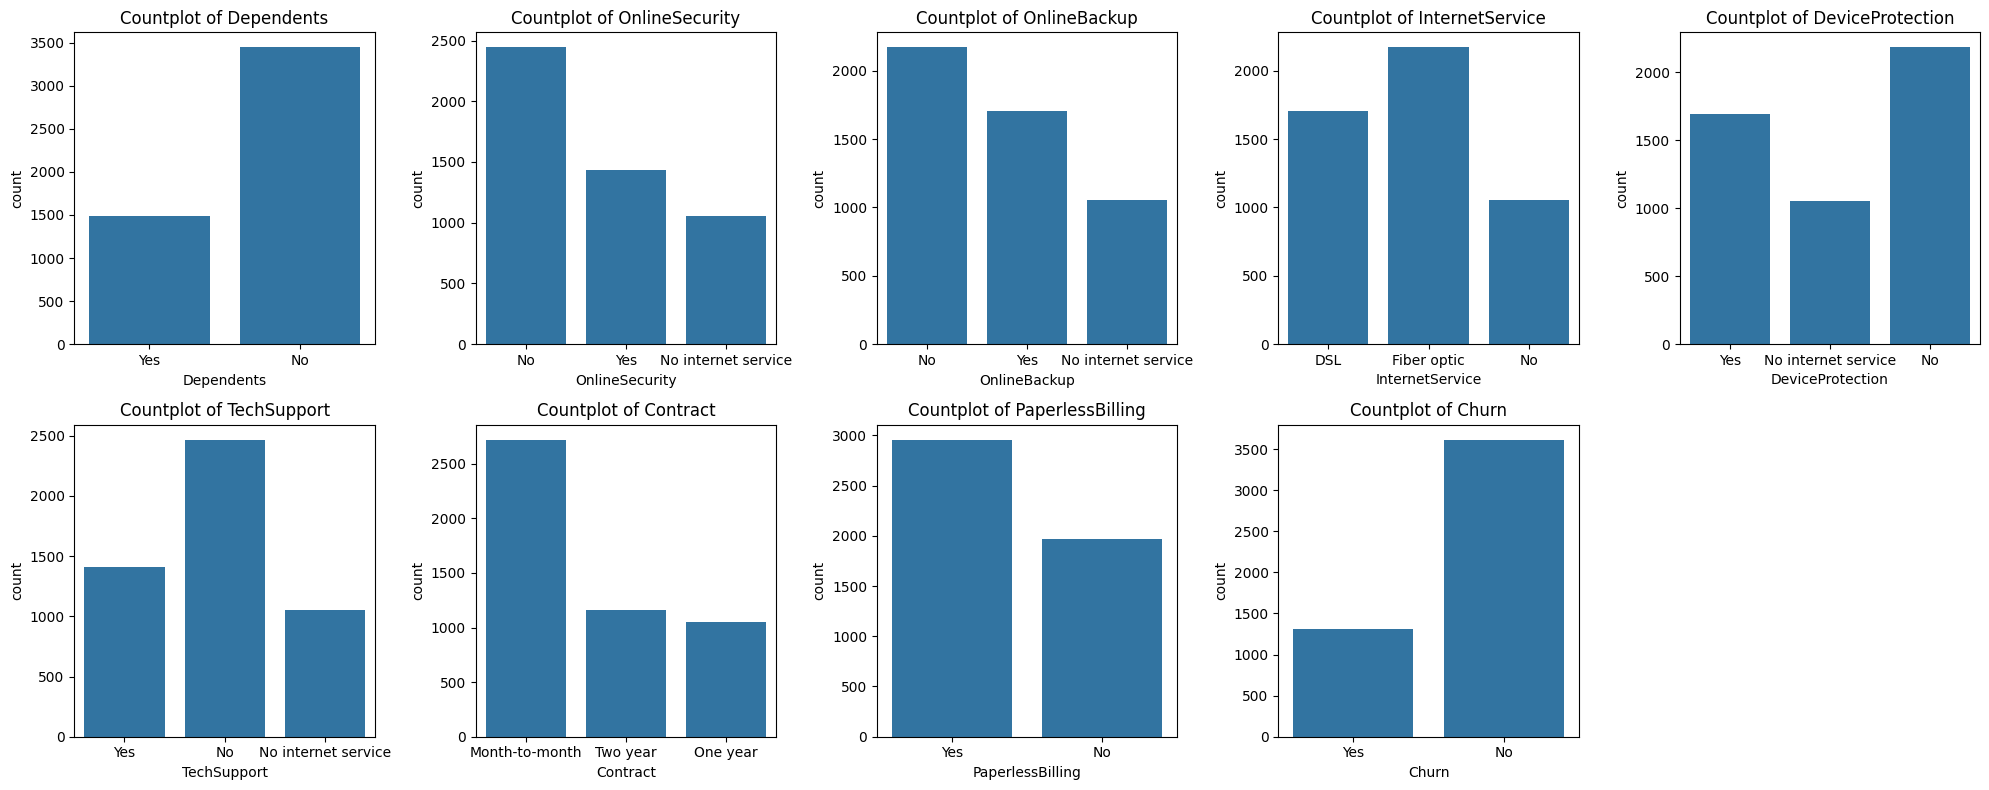

In [44]:
cat_cols = df.select_dtypes(include=['object']).columns
ncols = 5
n_cols = len(cat_cols)
nrows = n_cols // ncols + (n_cols % ncols > 0)


fig, axs = plt.subplots(nrows, ncols, figsize=(4 * ncols, 4 * nrows))
axs = axs.flatten() 

for i, col in enumerate(cat_cols):
    sns.countplot(x=df[col], ax=axs[i]) 
    axs[i].set_title(f"Countplot of {col}")
    axs[i].tick_params(axis='x') 

for j in range(len(cat_cols), nrows * ncols):
    fig.delaxes(axs[j])

plt.tight_layout() 
plt.show()

- Kita memiliki data yang imbalanced
- Dan kita memiliki 26.69% Pelanggan, berhenti berlangganan

In [45]:
df["Churn"].value_counts()

Churn
No     3614
Yes    1316
Name: count, dtype: int64

## Data Cleaning

Pada Tahap ini akan dilakukan pengecekan apakah terdapat missing value atau tidak

In [46]:
#Mengecek missing value pada data
df.isnull().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

 - Dari hasil diatas kita bisa tahu bahwa tidak terdapat missing value

## Feature Engineering

Beberapa fitur kategorikal memiliki label `"No"` dan `"No internet service"` yang secara makna sebenarnya menunjukkan kondisi tidak menggunakan layanan tersebut. Oleh karena itu, maka keduanya disatukan menjadi "No" 

In [47]:
#Mengganti nilai "No internet service" dengan "No"
df.replace("No internet service", "No", inplace=True)

Membuat fitur `"CustomerLiveValue"` yang mana bertujuan mengukur potensi nilai ekonomi pelanggan selama menggunakan layanan. Semakin lama durasi berlangganan (tenure) dan semakin tinggi biaya langganan (MonthlyCharges), semakin besar nilai pelanggan bagi perusahaan

In [48]:
df["CustomerLiveValue"] = df["tenure"] * df["MonthlyCharges"]

Mengatasi Skewness pada fitur `"CustomerLiveValue"`

In [49]:
df["CLV_log"] = np.log1p(df["CustomerLiveValue"])

Membuat fitur `"TenureGroup"`, yang mana berisi dari fitur "tenure" yang dikelompokkan dalam rentang waktu tertentu (dalam bulan)

Tujuannya:
- Menangkap pola perilaku churn berdasar durasi berlangganan
- Memudahkan model memahami segmen pelanggan (baru, menengah, loyal)

In [50]:
bins = [0, 6, 12, 24, 48, 72]
labels = ["0-6", "6-12", "12-24", "24-48", ">48"]

df["TenureGroup"] = pd.cut(df["tenure"], bins=bins, labels=labels, include_lowest=True)

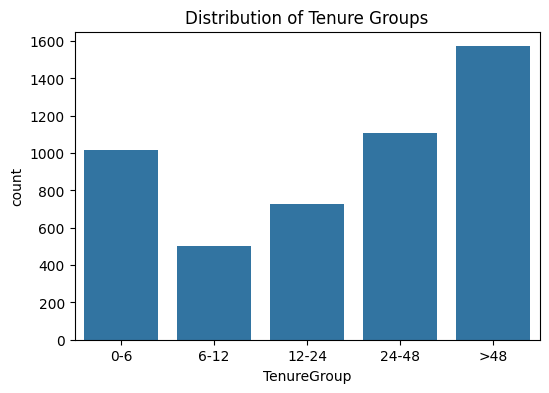

In [51]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['TenureGroup'])
plt.title("Distribution of Tenure Groups")
plt.show()

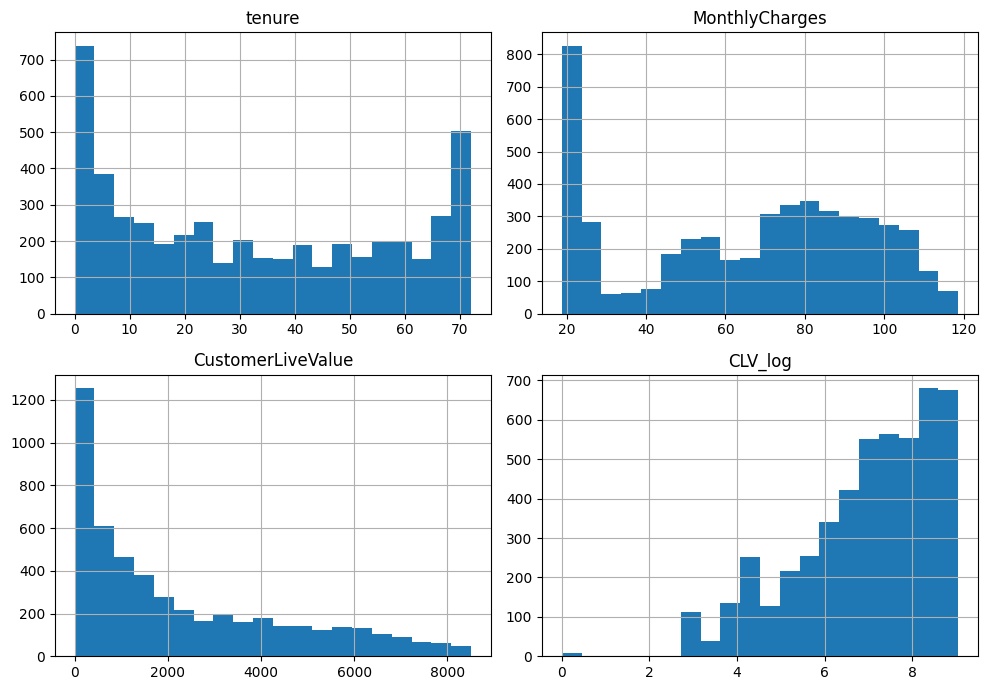

In [52]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols].hist(figsize=(10,7), bins=20)
plt.tight_layout()
plt.show()

- Dari Histogram diatas, fitur "CustomerLiveValue" yang awalnya sangat right-skewed berubah menjadi lebih simetris, hal ini membuat model dapat belajar pola dengan lebih stabil.

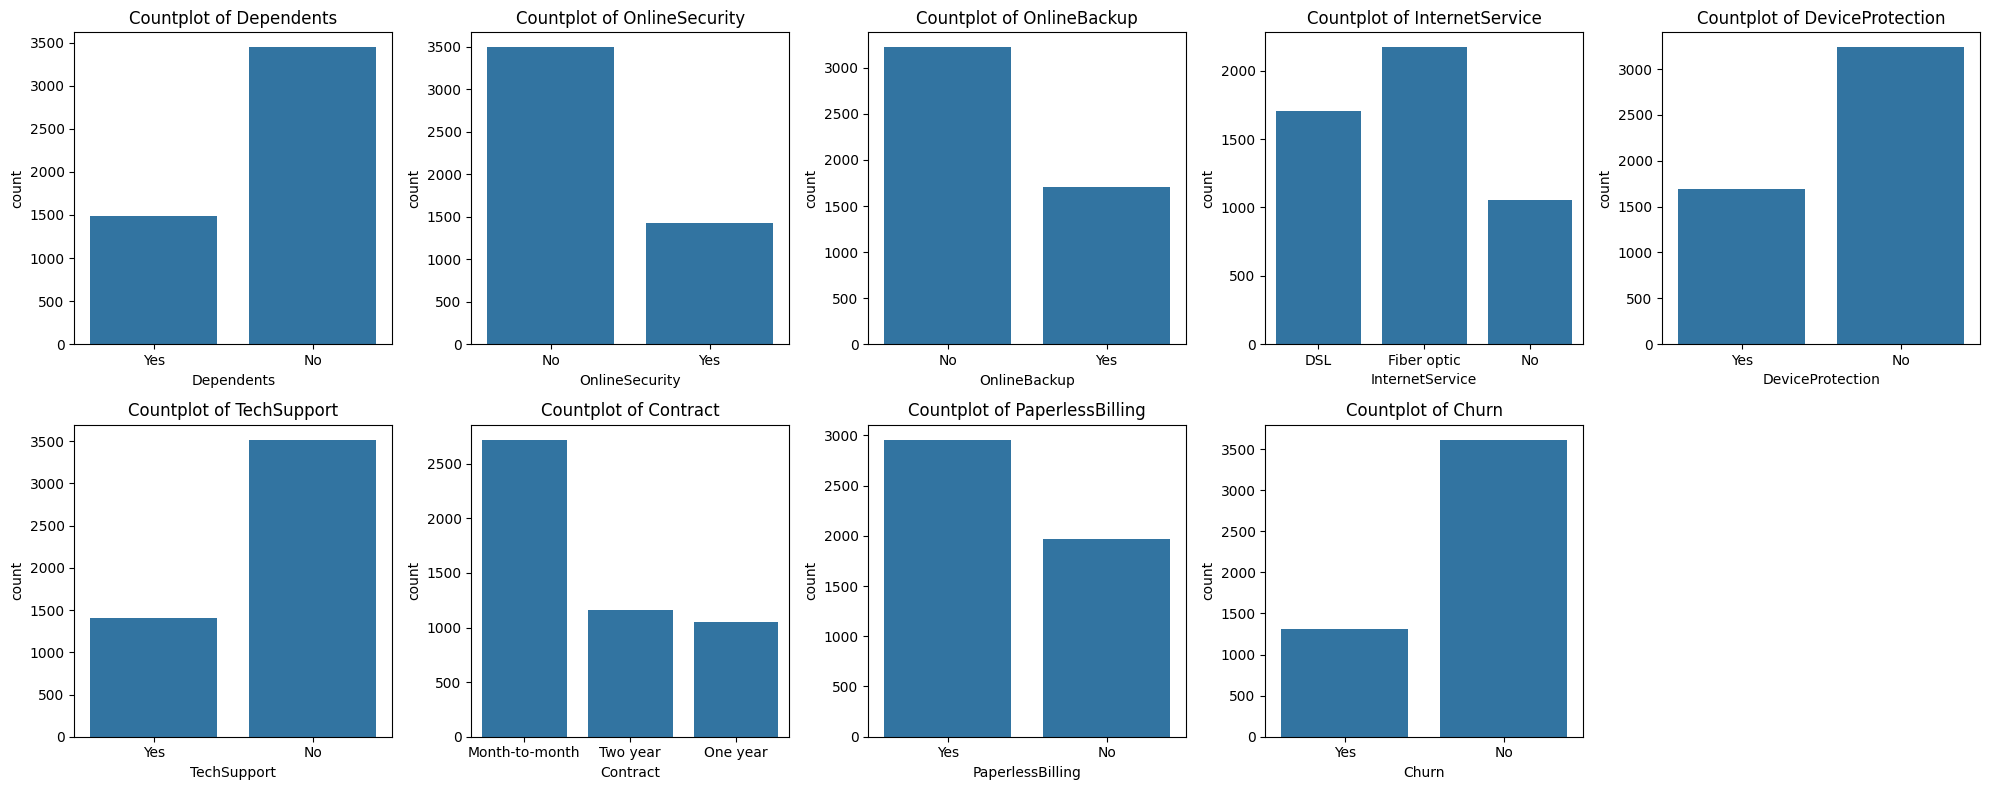

In [53]:
cat_cols = df.select_dtypes(include=['object']).columns
ncols = 5
n_cols = len(cat_cols)
nrows = n_cols // ncols + (n_cols % ncols > 0)


fig, axs = plt.subplots(nrows, ncols, figsize=(4 * ncols, 4 * nrows))
axs = axs.flatten() 

for i, col in enumerate(cat_cols):
    sns.countplot(x=df[col], ax=axs[i]) 
    axs[i].set_title(f"Countplot of {col}")
    axs[i].tick_params(axis='x') 

for j in range(len(cat_cols), nrows * ncols):
    fig.delaxes(axs[j])

plt.tight_layout() 
plt.show()

## Feature Selection & Splitting Dataset

- drop fitur "CustomerLiveValue" karena kita gunakan yang sudah di log transform
- drop fitur "tenure" dan "MonthlyCharges" karena kita sudah gunakan keduanya untuk Feature Engineering

In [54]:
# X = df.drop(columns=['Churn',"CustomerLiveValue",'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',"tenure","MonthlyCharges"])
X = df.drop(columns=['Churn',"CustomerLiveValue","tenure","MonthlyCharges"])
y = df['Churn']

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.2,
                                                 random_state=42,
                                                 stratify=y)

In [56]:
X_train.columns

Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
       'CLV_log', 'TenureGroup'],
      dtype='object')

## Encoding categorical features

In [57]:
label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder()
ohe_encoder = OneHotEncoder()

### Menggunakan Label Encoder

In [58]:
#encode fitur Dependents
X_train["Dependents"] = label_encoder.fit_transform(X_train["Dependents"])
X_test["Dependents"] = label_encoder.transform(X_test["Dependents"])

#encode fitur PaperlessBilling
X_train["PaperlessBilling"] = label_encoder.fit_transform(X_train["PaperlessBilling"])
X_test["PaperlessBilling"] = label_encoder.transform(X_test["PaperlessBilling"])

#encode fitur OnilineSecurity
X_train["OnlineSecurity"] = label_encoder.fit_transform(X_train["OnlineSecurity"])
X_test["OnlineSecurity"] = label_encoder.transform(X_test["OnlineSecurity"])

#encode fitur onlinebackup
X_train["OnlineBackup"] = label_encoder.fit_transform(X_train["OnlineBackup"])
X_test["OnlineBackup"] = label_encoder.transform(X_test["OnlineBackup"])

#encode fitur DeviceProtection
X_train["DeviceProtection"] = label_encoder.fit_transform(X_train["DeviceProtection"])
X_test["DeviceProtection"] = label_encoder.transform(X_test["DeviceProtection"])

#encode fitur TechSupport
X_train["TechSupport"] = label_encoder.fit_transform(X_train["TechSupport"])
X_test["TechSupport"] = label_encoder.transform(X_test["TechSupport"])

# #encode fitur TenureGroup
# X_train["TenureGroup"] = label_encoder.fit_transform(X_train["TenureGroup"])
# X_test["TenureGroup"] = label_encoder.transform(X_test["TenureGroup"])


In [59]:
#encode fitur churn
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

### Menggunakan Ordinal Encoder

In [60]:
#ordinal encoding
ordinal_encoder = OrdinalEncoder(categories=[
    # ["No", "Yes"],      # OnlineSecurity
    # ["No", "Yes"],   # OnlineBackup
    # ["No", "Yes"],      # DeviceProtection
    # ["No", "Yes"],   # TechSupport
    ["0-6","6-12","12-24","24-48",">48"],   # TenureGroup
    ["Month-to-month","One year","Two year"]         # Contract   
]) 

In [61]:
# ordinal_cols = ["OnlineSecurity", "OnlineBackup",
#                 "DeviceProtection", "TechSupport", "Contract"]
ordinal_cols = ["TenureGroup","Contract"]

X_train[ordinal_cols] = ordinal_encoder.fit_transform(X_train[ordinal_cols])
X_test[ordinal_cols] = ordinal_encoder.transform(X_test[ordinal_cols])

### Menggunakan OneHotEncoder (OHE)

In [62]:
#encode fitur InternetService dengan One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop=None, sparse_output=False)  # drop=None agar semua kategori muncul

ohe_train = ohe.fit_transform(X_train[['InternetService']])
ohe_test = ohe.transform(X_test[['InternetService']])

# Convert ke dataframe dengan nama kolom baru
ohe_cols = ohe.get_feature_names_out(['InternetService'])

ohe_train_df = pd.DataFrame(ohe_train, columns=ohe_cols, index=X_train.index)
ohe_test_df = pd.DataFrame(ohe_test, columns=ohe_cols, index=X_test.index)

# Drop kolom original
X_train = X_train.drop(columns=['InternetService'])
X_test = X_test.drop(columns=['InternetService'])

# Gabungkan kembali
X_train = pd.concat([X_train, ohe_train_df], axis=1)
X_test = pd.concat([X_test, ohe_test_df], axis=1)


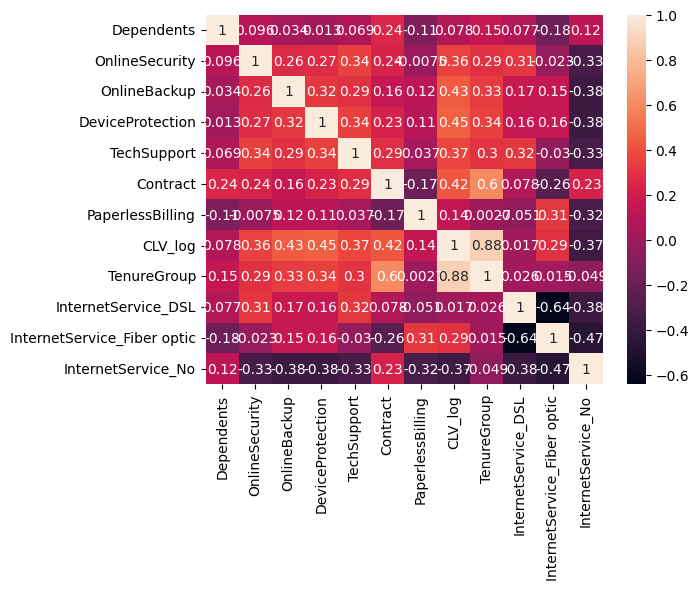

In [63]:
corr = X_train.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [64]:
feature_cols = X_train.columns.tolist()

In [65]:
#scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [67]:
print("Before SMOTE:", pd.Series(y_train).value_counts())
print("After SMOTE:", pd.Series(y_train_smote).value_counts())

Before SMOTE: 0    2891
1    1053
Name: count, dtype: int64
After SMOTE: 0    2891
1    2891
Name: count, dtype: int64


## Modelling (XGBoost)

Pada percobaan kali ini digunakan model `XGBoostClassifier`. yang merupakan salah satu model dalam algoritma Gradient Boosting. XGBoost membangun banyak Decision Tree berukuran kecil/sederhana (weak learners) yang masing-masing bertugas mengurangi error sedikit demi sedikit.

Alasan penggunaan: Cocok untuk data tabular, memiliki parameter `scale_pos_weight`, cepat dan efisien

In [68]:
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print("Scale pos weight:", scale_pos_weight)

param = {
    "n_estimators": [200, 400, 600],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.02, 0.05, 0.1],
    "subsample": [0.8, 1],
    "colsample_bytree": [0.8, 1],
    "gamma": [0, 1, 5],

    # "reg_alpha": [0, 0.1, 0.5, 1],      # L1 regularization
    # "reg_lambda": [1, 5, 10, 20],       # L2 regularization
}

xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

xgb_search = GridSearchCV(
    estimator=xgb,
    param_grid=param,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    verbose=1
)

xgb_search.fit(X_train, y_train)

print("Best Parameters:", xgb_search.best_params_)

Scale pos weight: 2.745489078822412
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


## Evaluasi Metrics

Pada tahap evaluasi model, beberapa metrik digunakan untuk mengukur performa model, yaitu:

`Accuracy`
`Precision`
`Recall (Prioritas Utama)`
`F1-Score`
`ROC–AUC Score`

Recall mengukur seberapa banyak pelanggan churn yang berhasil terdeteksi model.

![recall_formula (2).png](<attachment:recall_formula (2).png>)

Artinya, Recall fokus pada meminimalkan False Negative, yaitu kondisi ketika pelanggan sebenarnya akan churn tetapi model memprediksi sebagai tidak churn.


Dalam kasus, False Positive masih bisa diterima, karena:

> Lebih baik memberikan promo kepada pelanggan yang tetap loyal, daripada kehilangan pelanggan yang berniat pergi.

In [69]:
#Evaluasi pada data training
best_model = xgb_search.best_estimator_
y_pred_train = best_model.predict(X_train)

print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("F1 Score:", f1_score(y_train, y_pred_train))
print("ROC AUC Score:", roc_auc_score(y_train, best_model.predict_proba(X_train)[:,1]))

Accuracy: 0.7773833671399595
Precision: 0.556415215989684
Recall: 0.8195631528964862
F1 Score: 0.662826420890937
ROC AUC Score: 0.8642990345976626


In [70]:
#Evaluasi pada data testing
y_pred_test = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1 Score:", f1_score(y_test, y_pred_test))
print("ROC AUC Score:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1]))

Accuracy: 0.7586206896551724
Precision: 0.5318066157760815
Recall: 0.7946768060836502
F1 Score: 0.6371951219512195
ROC AUC Score: 0.8512166774476858


In [71]:
#classification report
print(classification_report(y_test, y_pred_test, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.91      0.75      0.82       723
         Yes       0.53      0.79      0.64       263

    accuracy                           0.76       986
   macro avg       0.72      0.77      0.73       986
weighted avg       0.81      0.76      0.77       986



- Model berhasil mencapai Recall 0.79 pada test set, sesuai tujuan bisnis (mengidentifikasi pelanggan churn semaksimal mungkin).

## Feature Importance

Feature Importance menunjukkan fitur mana yang paling berkontribusi terhadap keputusan model XGBoost dalam memprediksi apakah pelanggan akan churn atau tidak.

Contract                       0.404329
InternetService_Fiber optic    0.166622
TenureGroup                    0.101849
InternetService_No             0.056985
InternetService_DSL            0.052012
CLV_log                        0.041498
OnlineSecurity                 0.035866
PaperlessBilling               0.033845
OnlineBackup                   0.033211
TechSupport                    0.026837
Dependents                     0.025292
DeviceProtection               0.021654
dtype: float32


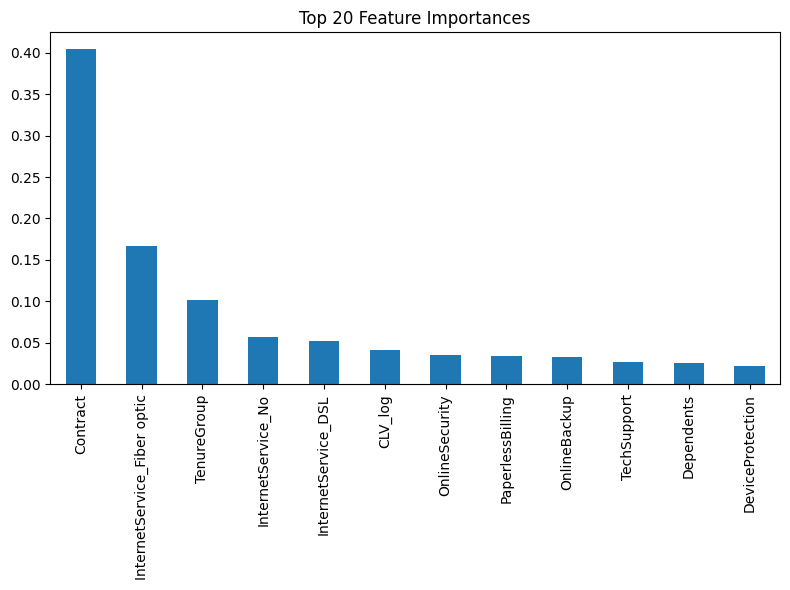

In [72]:
#Menampilkan feature importance
fi = pd.Series(best_model.feature_importances_, index=feature_cols).sort_values(ascending=False)
print(fi.head(20))

plt.figure(figsize=(8,6))
fi.head(20).plot(kind='bar')
plt.title('Top 20 Feature Importances')
plt.tight_layout()
plt.show()


## Plot ROC Curve

`ROC Curve` digunakan untuk mengevaluasi performa model berdasarkan trade-off antara:

- True Positive Rate (Recall) → seberapa banyak pelanggan churn yang berhasil dideteksi.

- False Positive Rate → seberapa banyak pelanggan non-churn yang salah diklasifikasikan sebagai churn.

ROC Curve membantu memastikan bahwa model mampu membedakan churn vs non-churn dengan baik, bukan hanya sekadar menebak.

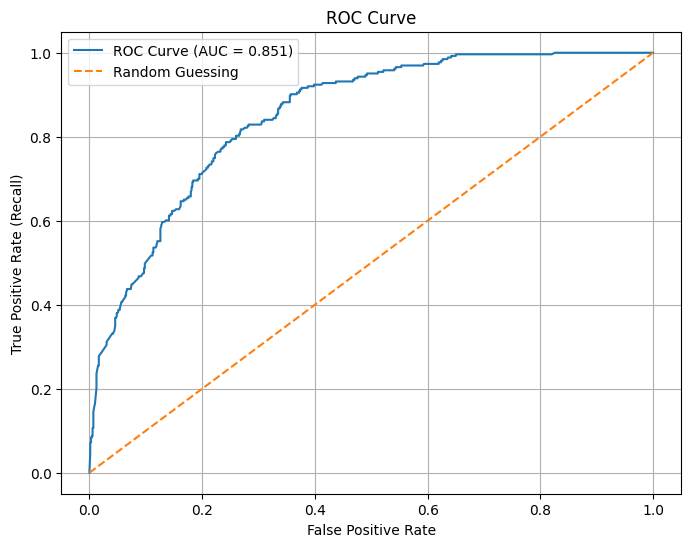

In [73]:
from sklearn.metrics import roc_curve
# Predict probabilitas
y_prob = best_model.predict_proba(X_test)[:, 1]

# Itung ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)


plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--', label="Random Guessing")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


- Garis biru menunjukkan performa model.

- Garis oranye merupakan baseline random guessing (model tanpa kemampuan prediksi).

Dengan nilai AUC = 0.851, model memiliki kemampuan yang baik untuk membedakan pelanggan yang churn dan tidak churn. Semakin dekat ke angka 1, semakin baik model memisahkan kedua kelas.

## Kesimpulan


Model XGBoost yang dibangun mampu memprediksi pelanggan churn dengan performa baik, khususnya dengan `metric Recall sebesar 0.79`,
sehingga efektif dalam mengidentifikasi pelanggan yang berpotensi berhenti berlangganan. Selain itu, dengan nilai ROC-AUC 0.851, model juga menunjukkan kemampuan klasifikasi yang kuat.

Hasil ini menunjukkan bahwa model mampu mengidentifikasi sebagian besar pelanggan yang berpotensi churn. Meskipun terdapat risiko False Positive (pelanggan loyal diprediksi churn), hal ini masih dapat diterima dalam konteks bisnis, karena:

> “Lebih baik memberikan penawaran promo kepada pelanggan loyal daripada kehilangan pelanggan yang berniat berhenti.”

Selain itu, analisis feature importance menunjukkan bahwa faktor-faktor seperti jenis Kontrak pelanggan, Jenis Layanan yang digunakan, serta durasi berlangganan memiliki pengaruh signifikan terhadap perilaku churn, Yang mana informasi ini dapat dimanfaatkan untuk strategi bisnis kedepannya